<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Read World bank CSV

In [3]:
dataset = pd.read_csv('WorldBank.csv')

In [4]:
dataset

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [5]:
population_data = dataset[dataset['Indicator Name'] == 'Population ages 15-64 (% of total population)']
population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


# Divide the data into input and output

In [6]:
x = np.arange(1960,2020).reshape(-1,1)
y = population_data.values[0][4:-1]

# Plot scatter plot of Population ages 15-64 (% of total population)

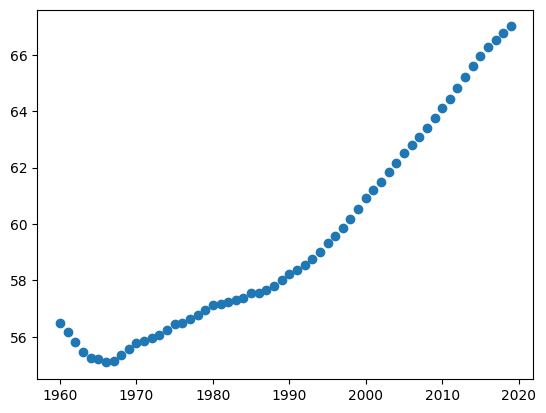

In [7]:
plt.scatter(x,y)

# Splitting the dataset into the Training set and Test set

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [9]:
x_test

array([[1991],
       [1980],
       [2019],
       [1977],
       [1970],
       [2004],
       [1994],
       [1975],
       [1981],
       [1990],
       [1997],
       [2005],
       [1972],
       [1973],
       [1987],
       [1978],
       [1992],
       [1961]])

# Fitting SVR on 3 Different Kernel on dataset

In [10]:
model_lin = SVR(kernel='linear')

In [13]:
model_poly = SVR(kernel='poly',C=1.0, epsilon=0.1,)

In [14]:
model_rbf = SVR(kernel='rbf')

In [15]:
model_lin.fit(x_train,y_train)

SVR(kernel='linear')

In [16]:
model_poly.fit(x_train,y_train)

SVR(kernel='poly')

In [17]:
model_rbf.fit(x_train,y_train)

SVR()

# Predict the x_test using 3 Kernel

In [18]:
y_predict_lin = model_lin.predict(x)
y_predict_poly = model_poly.predict(x)
y_predict_rbf = model_rbf.predict(x)

# Visualising the  results

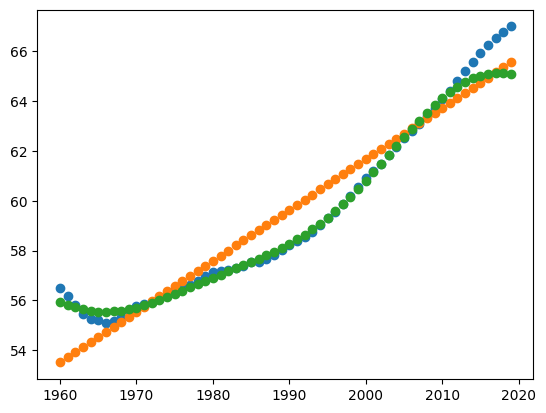

In [20]:
plt.scatter(x,y)
plt.scatter(x,y_predict_lin)
plt.scatter(x,y_predict_rbf)

# Decision Tree Classifier

In [21]:
# Visualising the  resultsfrom sklearn.datasets import load_iris

# Import iris data ser using sklearn

In [21]:
from sklearn.datasets import load_iris

# Importing the libraries

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Divide the data into input and output

In [28]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [25]:
x = data.data

In [27]:
y = data.target

# Splitting the dataset into the Training set and Test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

# Fitting DecisionTreeClassifier   on dataset

In [30]:
model = DecisionTreeClassifier()

In [31]:
t = model.fit(x_train,y_train)

# Display Decision Tree

[Text(0.3181818181818182, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 37, 35]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.2727272727272727, 0.8333333333333333, 'True  '),
 Text(0.4090909090909091, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.36363636363636365, 0.8333333333333333, '  False'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[2] <= 5.35\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0,

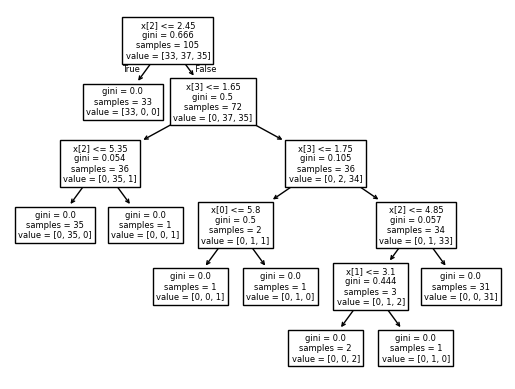

In [32]:
tree.plot_tree(t)

# Predict the x_test 

In [33]:
y_pred = model.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9555555555555556